In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import xgboost as xgb 
import catboost as cgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

/home/yogesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
% matplotlib inline
pd.set_option("display.max_columns",100)

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496
5,PF00001008,DSK00001006,OFF00001001,A,20040707,48741000.0,T,0.02074,USD,2.332216,4.865127e+07,20040726,NaN,20040810,A,NaN,NaN,0.02490
6,PF00001010,DSK00001009,OFF00001001,A,20040706,60593500.0,T,0.02074,USD,2.332216,6.048181e+07,20040726,NaN,20040809,A,NaN,NaN,0.02493
7,PF00001011,DSK00001009,OFF00001002,B,20040706,134200000.0,T,0.02074,USD,2.332216,1.339526e+08,20040726,NaN,20040809,B,NaN,NaN,0.02493
8,PF00001012,DSK00001010,OFF00001001,A,20040419,82929000.0,T,0.02074,USD,2.332216,8.250616e+07,20040726,NaN,20040720,A,NaN,NaN,0.02460
9,PF00001016,DSK00001014,OFF00001001,A,20040414,212476000.0,T,0.02074,USD,2.332216,2.114140e+08,20040727,NaN,20040713,A,NaN,NaN,0.02466


In [6]:
test.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN
5,PF00001015,DSK00001013,OFF00001001,A,20040710,212553000.0,T,0.02074,USD,2.332216,2.114103e+08,20040727,NaN,20041013,A,NaN,NaN
6,PF00001017,DSK00001015,OFF00001001,A,20040804,72831000.0,T,0.02075,USD,2.181960,7.270110e+07,20040804,NaN,20040816,A,NaN,NaN
7,PF00001023,DSK00001019,OFF00001001,A,20040712,44088000.0,T,0.02075,USD,2.181960,4.400673e+07,20040809,NaN,20040816,A,NaN,NaN
8,PF00001024,DSK00001020,OFF00001001,A,20040810,80234000.0,T,0.02075,USD,2.181960,7.978402e+07,20040810,NaN,20041116,A,NaN,NaN
9,PF00001025,DSK00001021,OFF00001001,A,20040810,176748000.0,N,0.02075,GBP,5.024006,1.760042e+08,20040810,NaN,20040913,C,NaN,NaN


In [7]:
df=train.copy()
dft=test.copy()

### Datatypes

In [8]:
test.dtypes

portfolio_id       object
desk_id            object
office_id          object
pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
dtype: object

In [9]:
print(df.select_dtypes(include=['object']).nunique(dropna=False))
print(test.select_dtypes(include=['object']).nunique(dropna=False))

portfolio_id      9366
desk_id           3993
office_id            2
pf_category          5
country_code         5
currency             5
indicator_code       2
type                 8
hedge_value          3
status               2
dtype: int64
portfolio_id      4801
desk_id           2198
office_id            2
pf_category          4
country_code         5
currency             5
indicator_code       2
type                 7
hedge_value          3
status               2
dtype: int64


### one pf and typ category missing in test data

In [10]:
print('train: '+df['type'].unique())
print('test: '+test['type'].unique())
print('train: '+df['pf_category'].unique())
print('test: '+test['pf_category'].unique())

['train: B' 'train: C' 'train: A' 'train: D' 'train: E' 'train: F'
 'train: G' 'train: H']
['test: A' 'test: B' 'test: C' 'test: D' 'test: E' 'test: F' 'test: H']
['train: B' 'train: A' 'train: C' 'train: D' 'train: E']
['test: A' 'test: B' 'test: C' 'test: D']


### remove that row with extra categorty

In [11]:
#because only 3 rows with the diffrent categories
df=df.loc[~df.pf_category.isin(['E'])]
df=df.loc[~df.type.isin(['G'])]

In [12]:
df.isnull().sum()

portfolio_id         0
desk_id           3664
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         472
bought               2
creation_date        0
indicator_code    5697
sell_date            0
type                 0
hedge_value       5698
status            3081
return               0
dtype: int64

In [13]:
test.isnull().sum()/len(test)

portfolio_id      0.000000
desk_id           0.405749
office_id         0.000000
pf_category       0.000000
start_date        0.000000
sold              0.000000
country_code      0.000000
euribor_rate      0.000000
currency          0.000000
libor_rate        0.055197
bought            0.000000
creation_date     0.000000
indicator_code    0.593835
sell_date         0.000000
type              0.000000
hedge_value       0.593835
status            0.303478
dtype: float64

In [14]:
dft=dft.drop(['portfolio_id'],axis=1)
label=df['return']
df=df.drop(['return'],axis=1)
df=df.drop(['portfolio_id'],axis=1)

In [15]:
fdf=pd.concat([df, dft])

### feature extraction and feature preprocessing

### Date conversions

In [16]:
fdf.start_date=pd.to_datetime(fdf.start_date,format='%Y%m%d')
fdf.creation_date=pd.to_datetime(fdf.creation_date,format='%Y%m%d')
fdf.sell_date=pd.to_datetime(fdf.sell_date,format='%Y%m%d')

### Diffrence in dates of sale , start and creation

In [17]:
fdf.sell_start = fdf.sell_date-fdf.start_date
fdf.creation_start = fdf.creation_date-fdf.start_date
fdf.sell_creation = fdf.sell_date-fdf.creation_date

In [18]:
#weekday and month ,year,day
fdf['sell_weekday']=fdf.sell_date.dt.weekday
fdf['start_weekday']=fdf.start_date.dt.weekday
fdf['creation_weekday']=fdf.sell_date.dt.weekday
fdf['sell_month']=fdf.sell_date.dt.month
fdf['start_month']=fdf.start_date.dt.month
fdf['creation_month']=fdf.sell_date.dt.month
fdf['sell_year']=fdf.sell_date.dt.year
fdf['start_year']=fdf.start_date.dt.year
fdf['creation_year']=fdf.sell_date.dt.year
fdf['sell_day']=fdf.sell_date.dt.day
fdf['start_day']=fdf.start_date.dt.day
fdf['creation_day']=fdf.sell_date.dt.day

In [19]:
fdf['sell_doy']=fdf.sell_date.dt.dayofyear
fdf['start_doy']=fdf.start_date.dt.dayofyear
fdf['creation_doy']=fdf.sell_date.dt.dayofyear
### drop dates 
fdf=fdf.drop(['start_date','creation_date','sell_date'],axis=1)

In [20]:
fdf.head()

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,currency,libor_rate,bought,indicator_code,type,hedge_value,status,sell_weekday,start_weekday,creation_weekday,sell_month,start_month,creation_month,sell_year,start_year,creation_year,sell_day,start_day,creation_day,sell_doy,start_doy,creation_doy
0,DSK00001001,OFF00001002,B,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,NaN,B,NaN,NaN,3,1,3,8,7,8,2004,2004,2004,12,20,12,225,202,225
1,DSK00001002,OFF00001001,A,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,NaN,C,NaN,NaN,3,4,3,8,7,8,2004,2004,2004,12,9,12,225,191,225
2,DSK00001004,OFF00001001,A,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,NaN,A,NaN,NaN,1,4,1,8,7,8,2004,2004,2004,17,23,17,230,205,230
3,DSK00001005,OFF00001001,A,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,NaN,A,NaN,NaN,1,2,1,7,6,7,2004,2004,2004,13,9,13,195,161,195
4,DSK00001005,OFF00001002,B,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,NaN,B,NaN,NaN,1,2,1,7,6,7,2004,2004,2004,13,9,13,195,161,195


### Null values treatment

In [21]:
fdf.sold=fdf.sold.fillna(fdf.sold.mean())
fdf.bought=fdf.bought.fillna(fdf.sold.mean())

In [22]:
fdf['null_libor']=fdf['libor_rate'].isnull().astype(int)

In [23]:
### clipping function
def outclip(x):
    up,low=np.percentile(x,[1,99])
    y=np.clip(x,up,low)
    return y

In [24]:
### log transform because both are very skew
fdf.sold=np.log(1+fdf.sold)
fdf.bought=np.log(1+fdf.bought)

### EDA

In [25]:
cr=fdf.corr()

/home/yogesh/anaconda3/lib/python3.6/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


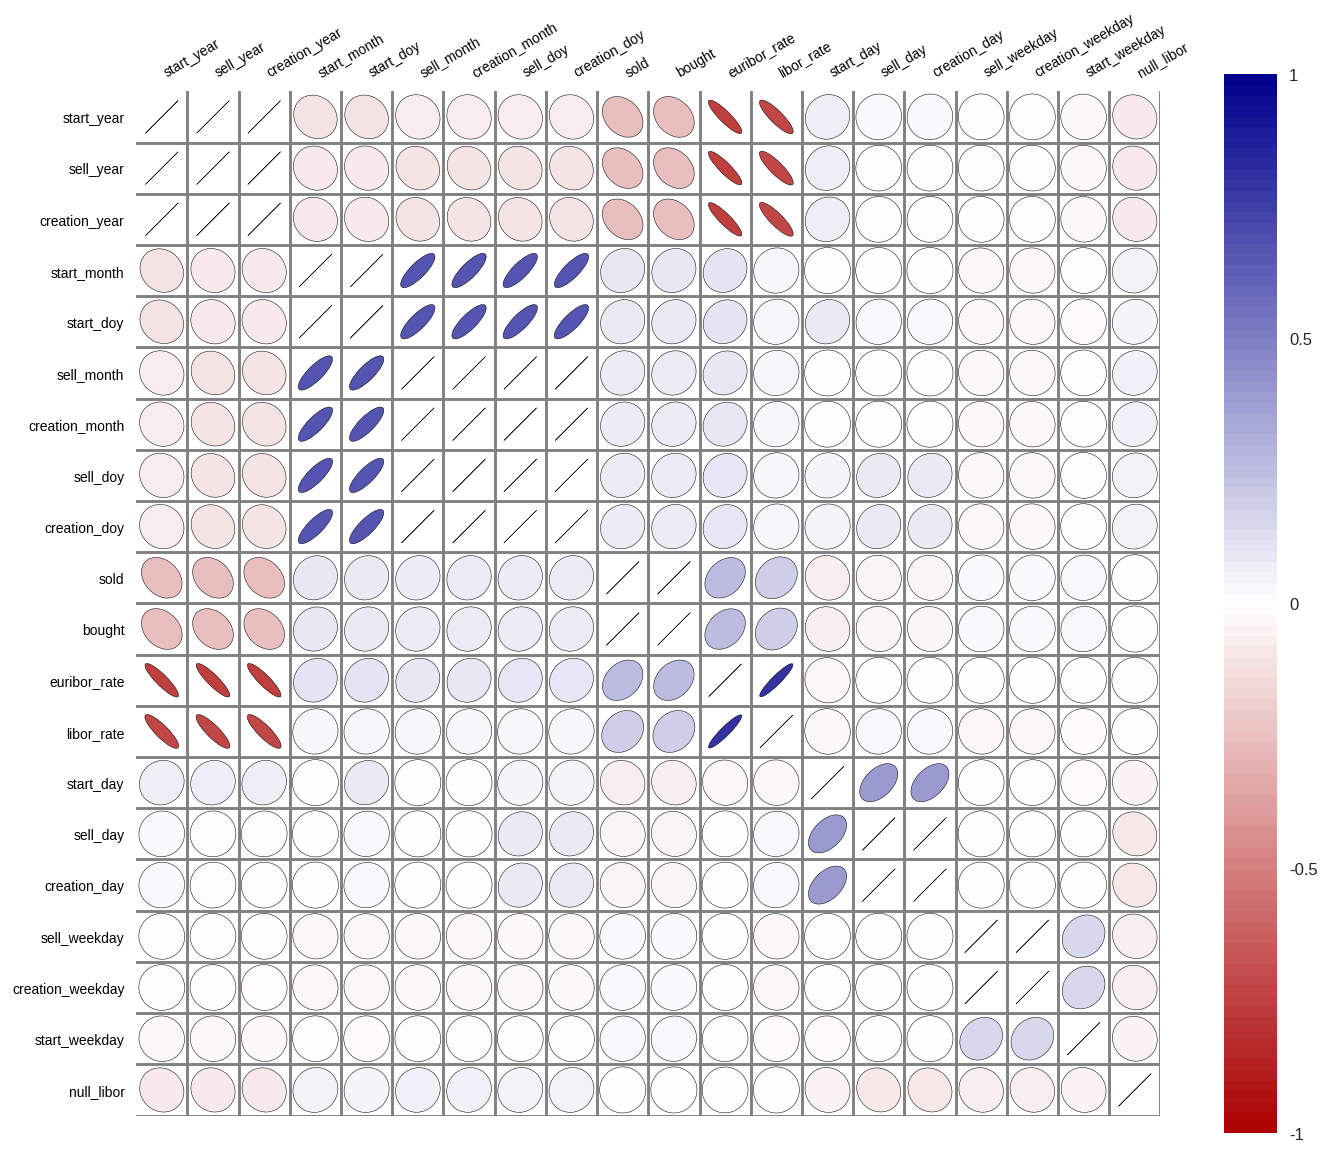

In [26]:
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['figure.dpi'] = 120
from biokit.viz import corrplot
c = corrplot.Corrplot(cr)
c.plot()

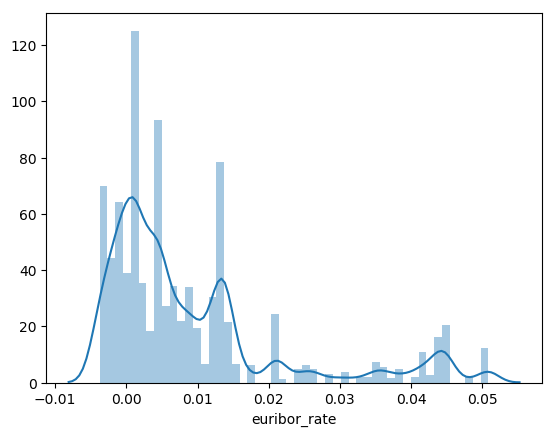

In [27]:
plt.rcParams.update(plt.rcParamsDefault)
sns.distplot(fdf.euribor_rate)

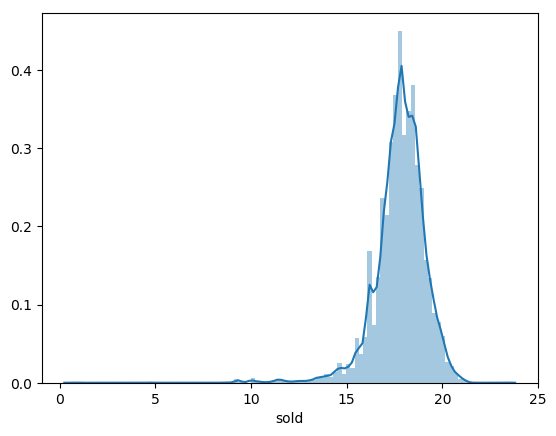

In [28]:
sns.distplot(fdf.sold,bins=100)

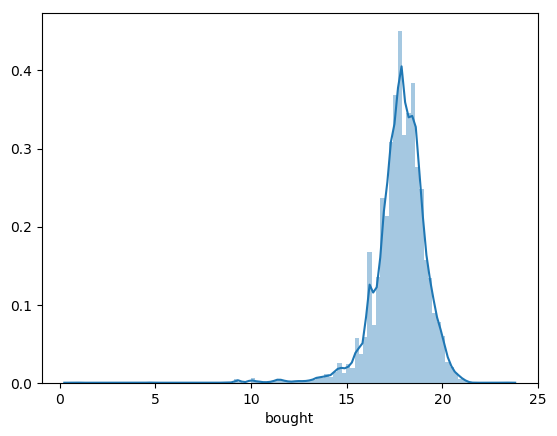

In [29]:
sns.distplot(fdf.bought,bins=100)

In [30]:
libor_rate=fdf.libor_rate.dropna()

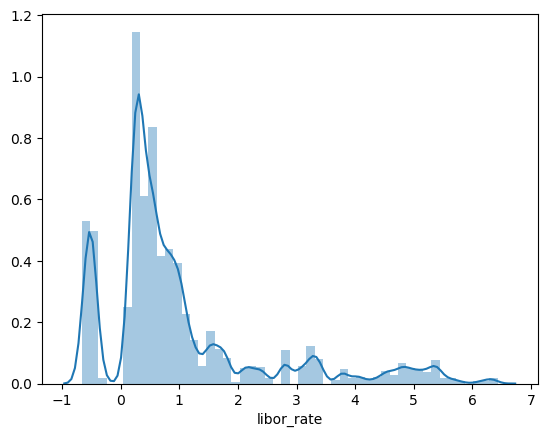

In [31]:
sns.distplot(libor_rate)

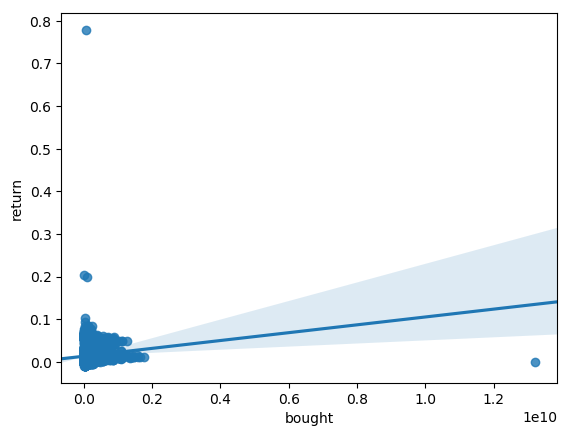

In [32]:
sns.regplot(x="bought", y="return", data=train)

### remove outlier from sold and bought

In [33]:
fdf.sold=outclip(fdf.sold)
fdf.bought=outclip(fdf.bought)
label=outclip(label)
train['return']=outclip(train['return'])


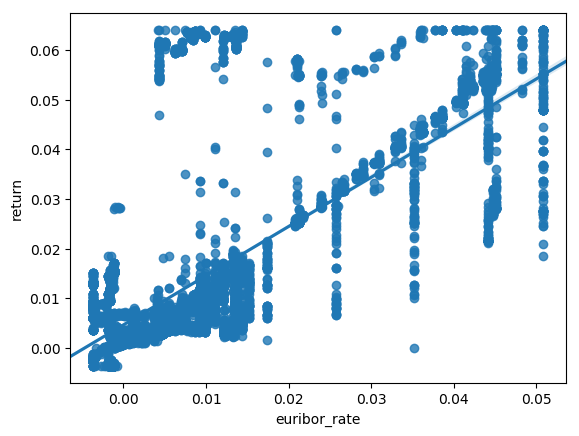

In [34]:
sns.regplot(x="euribor_rate", y="return", data=train)

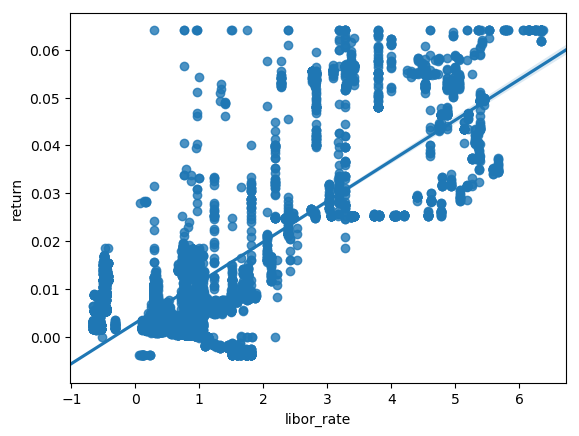

In [35]:
sns.regplot(x="libor_rate", y="return", data=train)

### We can see after removing outliers there exist very strong correlations and we get 4 back to back features affected by this

### categorical and ordinal features

In [36]:
## one hot encoding of columns 
catcols=['office_id','pf_category','country_code','currency','indicator_code','hedge_value','status']
fdf=pd.get_dummies(fdf,columns=['office_id','pf_category','country_code','currency','indicator_code','hedge_value','status'])

In [37]:
###label encodings
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fdf['desk_id']=le.fit_transform(fdf.desk_id.fillna('NN'))
le = preprocessing.LabelEncoder()
fdf['type']=le.fit_transform(fdf.type)

In [38]:
##save preprocessed datframe
fdf.to_csv('prefdf.csv',index=False)

In [39]:
fdf.head()

,desk_id,sold,euribor_rate,libor_rate,bought,type,sell_weekday,start_weekday,creation_weekday,sell_month,start_month,creation_month,sell_year,start_year,creation_year,sell_day,start_day,creation_day,sell_doy,start_doy,creation_doy,null_libor,office_id_OFF00001001,office_id_OFF00001002,pf_category_A,pf_category_B,pf_category_C,pf_category_D,country_code_M,country_code_N,country_code_T,country_code_U,country_code_Z,currency_CHF,currency_EUR,currency_GBP,currency_JPY,currency_USD,indicator_code_True,hedge_value_False,hedge_value_True,status_True
0,0,18.515991,0.02074,2.332216,18.514259,1,3,1,3,8,7,8,2004,2004,2004,12,20,12,225,202,225,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,18.989800,0.02074,5.269617,18.986042,2,3,4,3,8,7,8,2004,2004,2004,12,9,12,225,191,225,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,17.849291,0.02074,2.332216,17.847617,0,1,4,1,8,7,8,2004,2004,2004,17,23,17,230,205,230,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,4,18.920322,0.02074,2.332216,18.918475,0,1,2,1,7,6,7,2004,2004,2004,13,9,13,195,161,195,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,4,18.762851,0.02074,2.332216,18.761004,1,1,2,1,7,6,7,2004,2004,2004,13,9,13,195,161,195,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### train test split

In [40]:
df=fdf[:len(df)]
dft=fdf[len(df):]

In [41]:
X_train, X_test, y_train, y_test = train_test_split( df, label, test_size=0.2, random_state=1)

## Models 

### Xgboost

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [76]:
param = {'max_depth': 6, 'eta': 0.003, 'silent': 1, 'objective': 'reg:linear','seed':1}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [77]:
num_round = 600
bst = xgb.train(param, dtrain,num_round , evallist)

[0]	eval-auc:0.747792	train-auc:0.739735
[1]	eval-auc:0.747792	train-auc:0.739735
[2]	eval-auc:0.747792	train-auc:0.739735
[3]	eval-auc:0.747792	train-auc:0.739735
[4]	eval-auc:0.747792	train-auc:0.739735
[5]	eval-auc:0.747792	train-auc:0.739735
[6]	eval-auc:0.747792	train-auc:0.739735
[7]	eval-auc:0.747792	train-auc:0.739735
[8]	eval-auc:0.747792	train-auc:0.739735
[9]	eval-auc:0.747792	train-auc:0.739735
[10]	eval-auc:0.747792	train-auc:0.739735
[11]	eval-auc:0.747792	train-auc:0.739735
[12]	eval-auc:0.747792	train-auc:0.739735
[13]	eval-auc:0.747792	train-auc:0.739735
[14]	eval-auc:0.747792	train-auc:0.739735
[15]	eval-auc:0.747792	train-auc:0.739735
[16]	eval-auc:0.747792	train-auc:0.739735
[17]	eval-auc:0.747792	train-auc:0.739735
[18]	eval-auc:0.747792	train-auc:0.739735
[19]	eval-auc:0.747792	train-auc:0.739735
[20]	eval-auc:0.747792	train-auc:0.739735
[21]	eval-auc:0.747792	train-auc:0.739735
[22]	eval-auc:0.747792	train-auc:0.739735
[23]	eval-auc:0.747792	train-auc:0.739735
[2

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, bst.predict(dtest))

-16.737359002696277

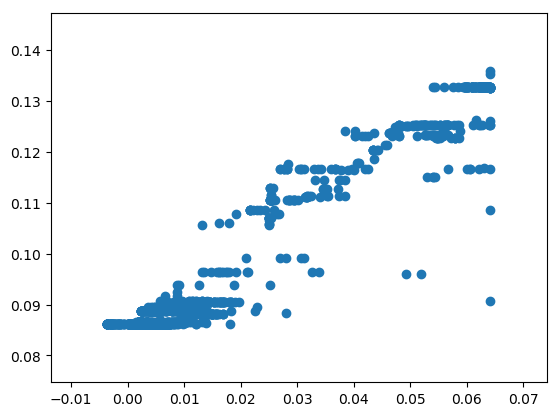

In [79]:
plt.scatter(y_test, bst.predict(dtest))

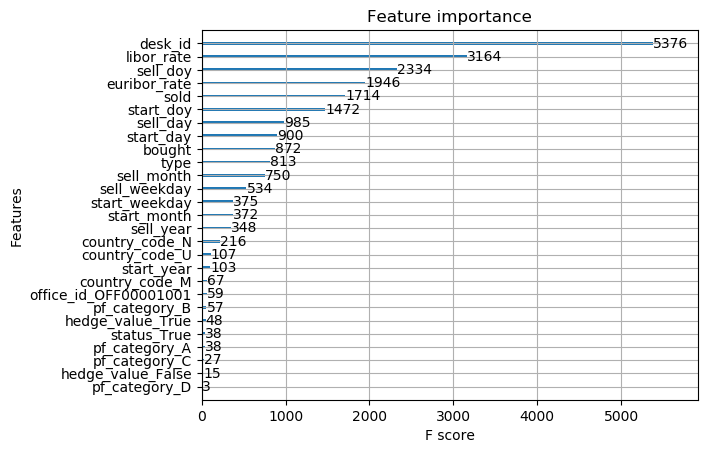

In [47]:
xgb.plot_importance(bst)

In [51]:
xgbtest=xgb.DMatrix(dft)

In [52]:
pred=bst.predict(xgbtest)

In [54]:
sub=pd.DataFrame({'portfolio_id' : test.portfolio_id,
                 'return' : pred})

In [56]:
sub.to_csv('xgbbase.csv',index=False)